# Test r estimate CMB realization/spectra

In [1]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import jax
from jax import random, dtypes
import jax.numpy as jnp
import jax.scipy as jsp
import jax_healpy as jhp
import jax.experimental.sparse as jsparse
import chex as chx
import scipy
import healpy as hp
import astropy.io.fits as fits
import camb
import numpyro.distributions as dist
import toml
import lineax as lx
import fgbuster
from fgbuster import get_instrument, get_observation, get_noise_realization

import micmac as micmac

In [2]:
PRNGKey = random.PRNGKey(0)


In [3]:
sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('')))+'/tutorials/')

In [4]:
# working_directory_path = os.path.abspath('') + '/'
working_directory_path = '/Users/mag/Documents/PHD1Y/Space_Work/Pixel_non_P2D/MICMAC/test_playground/Paper_runs/'
directory_save_file = working_directory_path + 'save_directory/'
directory_toml_file = working_directory_path + 'main_params/'
directory_additional_params = working_directory_path + 'additional_params/'

path_toml_file = directory_toml_file + 'corr_cutsky_LB_r2_v0a.toml'
path_additional_params = directory_additional_params + 'add_corr_cutsky_LB_d0s0_nside0_v0a.toml'

In [5]:
foreground_bool = True

In [6]:
MICMAC_sampler_obj = micmac.create_MICMAC_sampler_from_toml_file(path_toml_file)

No spatial variability case



>>> Tree of spv config as passed by the User:
root
  nside_spv
    default: [0]
    f0
      default: None
      b0
        default: None
      b1
        default: None
      b2
        default: None
      b3
        default: None
      b4
        default: None
      b5
        default: None
      b6
        default: None
      b7
        default: None
      b8
        default: None
      b9
        default: None
      b10
        default: None
      b11
        default: None
      b12
        default: None
    f1
      default: None
      b0
        default: None
      b1
        default: None
      b2
        default: None
      b3
        default: None
      b4
        default: None
      b5
        default: None
      b6
        default: None
      b7
        default: None
      b8
        default: None
      b9
        default: None
      b10
        default: None
      b11
        default: None
      b12
        default: None

>>> Tree of spv config after filling the missing val

In [7]:
with open(path_additional_params) as f:
    dictionary_additional_parameters = toml.load(f)
f.close()

In [8]:
instrument = fgbuster.get_instrument(MICMAC_sampler_obj.instrument_name)

fgs_model_ = dictionary_additional_parameters['fgs_model']

np.random.seed(dictionary_additional_parameters['seed_realization_input'])
noise_map = get_noise_realization(MICMAC_sampler_obj.nside, instrument)[:, 1:, :]

if foreground_bool:
    fgs_model = dictionary_additional_parameters['fgs_model']
    np.random.seed(dictionary_additional_parameters['seed_realization_input'])
    freq_maps_fgs_denoised = get_observation(instrument, fgs_model_, nside=MICMAC_sampler_obj.nside, noise=False)[:, 1:, :]   # keep only Q and U
    

    freq_maps_fgs = freq_maps_fgs_denoised + noise_map
else:
    freq_maps_fgs = noise_map
instrument

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,frequency,depth_p,depth_i,fwhm,f_sky,status,reference,type,note,experiment
0,40.0,37.42,26.46,70.5,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
1,50.0,33.46,23.66,58.5,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
2,60.0,21.31,15.07,51.1,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
3,68.0,16.87,11.93,47.1,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
4,78.0,12.07,8.53,43.8,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
5,89.0,11.30,7.99,41.5,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
6,100.0,6.56,4.64,37.8,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
7,119.0,4.58,3.24,33.6,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
8,140.0,4.79,3.39,30.8,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD
9,166.0,5.57,3.94,28.9,1.0,forecast,"arXiv:2202.02773, Table 13",satellite,Different instruments at the same freq were co...,LiteBIRD


F_sky =  0.6038818359375


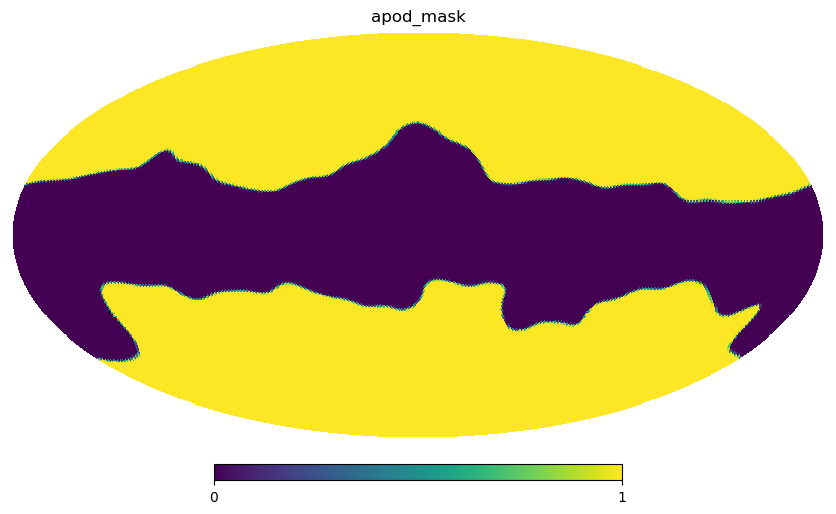

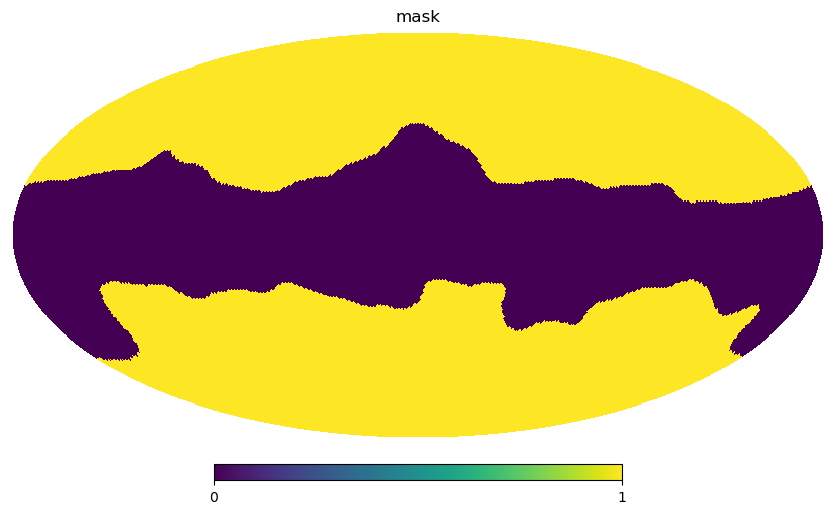

In [9]:
# path_mask = "/Users/mag/Documents/PHD1Y/Masks/mask_SAT_apodized.fits"
path_mask = "/Users/mag/Documents/PHD1Y/Masks/Planck_mask_fsky_60.fits"

relative_treshold = 3*1e-1

apod_mask = hp.ud_grade(hp.read_map(path_mask),nside_out=MICMAC_sampler_obj.nside, dtype=np.float64)
mask = np.copy(apod_mask)

# mask[apod_mask>0] = 1
mask[apod_mask<=relative_treshold] = 0
mask[apod_mask>relative_treshold] = 1

mask = mask.astype(np.int64)

print("F_sky = ", np.sum(mask)/len(mask))

hp.mollview(apod_mask, title='apod_mask')
hp.mollview(mask, title='mask')


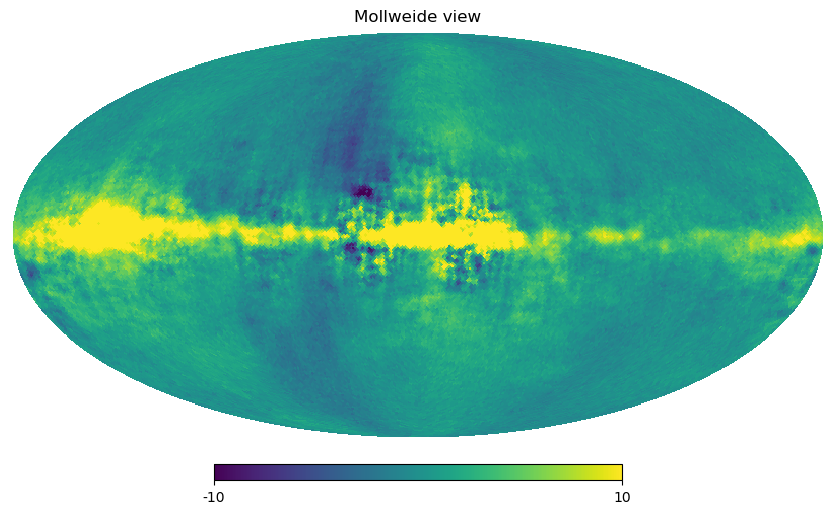

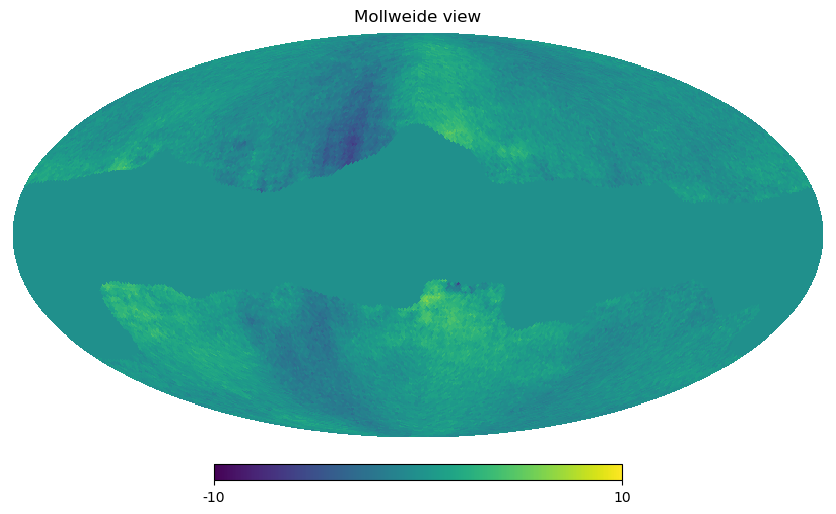

In [10]:
hp.mollview(freq_maps_fgs[2,0], min=-10, max=10) # Freq, nstokes, n_pix
hp.mollview(freq_maps_fgs[2,0]*mask, min=-10, max=10) # Freq, nstokes, n_pix

In [11]:
# mask = np.ones(MICMAC_sampler_obj.n_pix)

MICMAC_sampler_obj.mask = np.array(mask)

In [12]:
# freq_inverse_noise = micmac.get_noise_covar(instrument['depth_p']/reduction_noise, MICMAC_sampler_obj.nside)
freq_inverse_noise_0 = micmac.get_noise_covar(instrument['depth_p'], MICMAC_sampler_obj.nside) #MICMAC_sampler_obj.freq_inverse_noise

freq_inverse_noise_masked = micmac.get_noise_covar_extended(instrument['depth_p'], MICMAC_sampler_obj.nside)*MICMAC_sampler_obj.mask

MICMAC_sampler_obj.freq_inverse_noise = freq_inverse_noise_masked

freq_inverse_noise = freq_inverse_noise_masked

MICMAC_sampler_obj.freq_noise_c_ell = micmac.get_true_Cl_noise(np.array(instrument['depth_p']), MICMAC_sampler_obj.lmax)

In [13]:
indices_polar = np.array([1,2,4])
partial_indices_polar = indices_polar[:MICMAC_sampler_obj.nstokes]

In [14]:
init_mixing_matrix_obj = micmac.InitMixingMatrix(freqs=np.array(instrument['frequency']), 
                                                 ncomp=MICMAC_sampler_obj.n_components, 
                                                 pos_special_freqs=MICMAC_sampler_obj.pos_special_freqs, 
                                                 spv_nodes_b=MICMAC_sampler_obj.spv_nodes_b)
init_params = init_mixing_matrix_obj.init_params()

mixing_matrix_obj = micmac.MixingMatrix(instrument['frequency'], 
                                        n_components=MICMAC_sampler_obj.n_components, 
                                        params=init_params, 
                                        pos_special_freqs=MICMAC_sampler_obj.pos_special_freqs, 
                                        spv_nodes_b=MICMAC_sampler_obj.spv_nodes_b, 
                                        nside=MICMAC_sampler_obj.nside)

mixing_matrix_sampled = mixing_matrix_obj.get_B()

invBtinvNB = micmac.get_inv_BtinvNB(freq_inverse_noise, mixing_matrix_sampled)
BtinvN_sqrt = micmac.get_BtinvN(np.sqrt(freq_inverse_noise), mixing_matrix_sampled)#*mask

BtinvN = micmac.get_BtinvN(freq_inverse_noise, mixing_matrix_sampled)


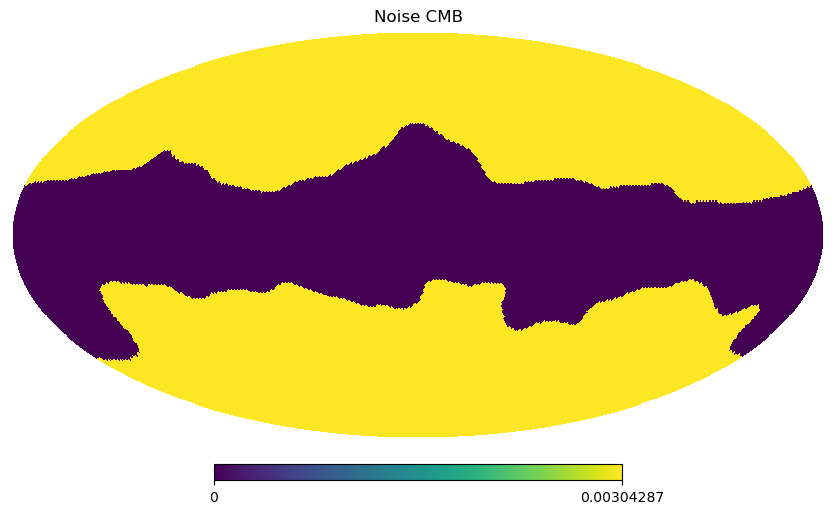

In [15]:
hp.mollview(invBtinvNB[0,0], title='Noise CMB')

In [16]:
np.random.seed(dictionary_additional_parameters['seed_realization_input']+1)

input_freq_maps, input_cmb_maps, theoretical_red_cov_r0_total, theoretical_red_cov_r1_tensor = MICMAC_sampler_obj.generate_input_freq_maps_from_fgs(freq_maps_fgs, return_only_freq_maps=False)

input_freq_maps_masked = input_freq_maps*mask
# input_cmb_maps = input_cmb_maps*mask

Calculating spectra from CAMB !
Calculating spectra from CAMB !


In [17]:
s_cML = micmac.get_Wd(freq_inverse_noise, mixing_matrix_sampled, input_freq_maps_masked, jax_use=True)[0, :, :]

In [18]:
map_CMB_extended = np.vstack([np.zeros_like(input_cmb_maps[0,0]), input_cmb_maps[0]])
c_ell_CMB_map = hp.anafast(map_CMB_extended, lmax=MICMAC_sampler_obj.lmax)[indices_polar,MICMAC_sampler_obj.lmin:]*(2*jnp.arange(MICMAC_sampler_obj.lmin, MICMAC_sampler_obj.lmax+1) +1) 


def get_r_estimate_EB(self, c_ell_CMB_map, theoretical_red_cov_r0_total, theoretical_red_cov_r1_tensor):

    indices_polar = np.array([1,2])

    theoretical_func_r = lambda r: theoretical_red_cov_r0_total + r*theoretical_red_cov_r1_tensor

    red_cov_CMB_map = micmac.get_reduced_matrix_from_c_ell(c_ell_CMB_map)

    sum_dets = lambda r: ( (2*jnp.arange(self.lmin, self.lmax+1) +1) * jnp.log(jnp.linalg.det(theoretical_func_r(r))) ).sum()

    likelihood_func = lambda r: (jnp.einsum('lij,lji->l', red_cov_CMB_map, jnp.linalg.pinv(theoretical_func_r(r))).sum() + sum_dets(r))/2

    r_estimate = scipy.optimize.minimize_scalar(likelihood_func, bounds=(0, 1), method='bounded').x
    return r_estimate


def get_r_estimate_B(self, c_ell_BB_CMB_map, theoretical_BB_r1_tensor):    
    indices_polar = np.array([1,2])

    theoretical_func_r = lambda r: r*theoretical_BB_r1_tensor + theoretical_red_cov_r0_total[:,1,1]

    sum_dets = lambda r: ( (2*jnp.arange(self.lmin, self.lmax+1) +1) * jnp.log(theoretical_func_r(r))).sum()

    likelihood_func = lambda r: ((c_ell_BB_CMB_map/theoretical_func_r(r)).sum() + sum_dets(r))/2

    r_estimate = scipy.optimize.minimize_scalar(likelihood_func, bounds=(0, 1), method='bounded').x
    return r_estimate

def get_report_estimate_B(self, c_ell_BB_CMB_map, theoretical_BB_r1_tensor):    
    indices_polar = np.array([1,2])

    theoretical_func_r = lambda r: r*theoretical_BB_r1_tensor + theoretical_red_cov_r0_total[:,1,1]

    sum_dets = lambda r: ( (2*jnp.arange(self.lmin, self.lmax+1) +1) * jnp.log(theoretical_func_r(r))).sum()

    likelihood_func = lambda r: ((c_ell_BB_CMB_map/theoretical_func_r(r)).sum() + sum_dets(r))/2

    return scipy.optimize.minimize_scalar(likelihood_func, bounds=(0, 1), method='bounded')#.x

In [19]:
def get_binned_r_estimate_B(self, c_ell_BB_CMB_map, theoretical_BB_r1_tensor):    
    indices_polar = np.array([1,2])

    binned_theoretical_BB_r1_tensor = self.get_binned_c_ells(theoretical_BB_r1_tensor)
    binned_theoretical_BB_r0_lensing = self.get_binned_c_ells(theoretical_red_cov_r0_total[:,1,1])

    # theoretical_func_r = lambda r: r*theoretical_BB_r1_tensor + theoretical_red_cov_r0_total[:,1,1]
    theoretical_func_r_binned = lambda r: r*binned_theoretical_BB_r1_tensor + binned_theoretical_BB_r0_lensing

    # m_dependency = self.get_binned_c_ells((2*jnp.arange(self.lmin, self.lmax+1) +1))
    m_dependency = 2*(self.bin_ell_distribution[1:] + self.bin_ell_distribution[:-1])/2 + 1
    
    # sum_dets = lambda r: ( (2*jnp.arange(self.lmin, self.lmax+1) +1) * jnp.log(theoretical_func_r_binned(r))).sum()
    sum_dets = lambda r: (m_dependency * jnp.log(theoretical_func_r_binned(r))).sum()

    binned_c_ell = self.get_binned_c_ells(c_ell_BB_CMB_map/(2*jnp.arange(self.lmin, self.lmax+1) +1))

    likelihood_func = lambda r: ((m_dependency*binned_c_ell/theoretical_func_r_binned(r)).sum() + sum_dets(r))/2

    r_estimate = scipy.optimize.minimize_scalar(likelihood_func, bounds=(0, 1), method='bounded').x
    return r_estimate

def get_binned_r_estimate_B_v2(self, c_ell_BB_CMB_map, theoretical_BB_r1_tensor):    
    indices_polar = np.array([1,2])

    binned_theoretical_BB_r1_tensor = self.get_binned_c_ells(theoretical_BB_r1_tensor)
    binned_theoretical_BB_r0_lensing = self.get_binned_c_ells(theoretical_red_cov_r0_total[:,1,1])

    # theoretical_func_r = lambda r: r*theoretical_BB_r1_tensor + theoretical_red_cov_r0_total[:,1,1]
    theoretical_func_r_binned = lambda r: r*binned_theoretical_BB_r1_tensor + binned_theoretical_BB_r0_lensing

    # m_dependency = self.get_binned_c_ells((2*jnp.arange(self.lmin, self.lmax+1) +1))
    number_dof = self.bin_ell_distribution[1:]**2 - self.bin_ell_distribution[:-1]**2
    
    # sum_dets = lambda r: ( (2*jnp.arange(self.lmin, self.lmax+1) +1) * jnp.log(theoretical_func_r_binned(r))).sum()
    sum_dets = lambda r: (number_dof * jnp.log(theoretical_func_r_binned(r))).sum()

    binned_c_ell = self.get_binned_c_ells(c_ell_BB_CMB_map/(2*jnp.arange(self.lmin, self.lmax+1) +1))

    likelihood_func = lambda r: ((number_dof*binned_c_ell/theoretical_func_r_binned(r)).sum() + sum_dets(r))/2

    r_estimate = scipy.optimize.minimize_scalar(likelihood_func, bounds=(0, 1), method='bounded').x
    return r_estimate


In [20]:
test_r_minimizer = get_r_estimate_EB(MICMAC_sampler_obj, c_ell_CMB_map, theoretical_red_cov_r0_total, theoretical_red_cov_r1_tensor)
test_r_minimizer

Array(0.01005526, dtype=float64)

In [21]:
test_r_minimizer = get_r_estimate_B(MICMAC_sampler_obj, c_ell_CMB_map[1], theoretical_red_cov_r1_tensor[:,1,1])
test_r_minimizer

Array(0.01004892, dtype=float64)

In [22]:
test_r_minimizer = get_binned_r_estimate_B(MICMAC_sampler_obj, c_ell_CMB_map[1], theoretical_red_cov_r1_tensor[:,1,1])
test_r_minimizer

Array(0.01004149, dtype=float64)

In [23]:
test_r_minimizer = get_binned_r_estimate_B_v2(MICMAC_sampler_obj, c_ell_CMB_map[1], theoretical_red_cov_r1_tensor[:,1,1])
test_r_minimizer

Array(0.01004892, dtype=float64)

In [24]:
input_cmb_maps_ = np.copy(input_cmb_maps[0])

map_CMB_extended = np.vstack([np.zeros_like(input_cmb_maps_[0]), input_cmb_maps_])
c_ell_CMB_map_0 = hp.anafast(map_CMB_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]#*(2*jnp.arange(MICMAC_sampler_obj.lmin, MICMAC_sampler_obj.lmax+1) +1) 

select_B_modes = np.eye(MICMAC_sampler_obj.nstokes)
select_B_modes[0,0] = 0
red_select_B_modes = np.einsum('l,ij->lij', np.ones(MICMAC_sampler_obj.lmax+1-MICMAC_sampler_obj.lmin), select_B_modes)

input_CMB_map_without_E_modes = micmac.maps_x_red_covariance_cell_JAX(input_cmb_maps_, 
                                                                      red_select_B_modes, 
                                                                      nside=MICMAC_sampler_obj.nside, 
                                                                      lmin=MICMAC_sampler_obj.lmin, 
                                                                      n_iter=MICMAC_sampler_obj.n_iter)

map_CMB_without_E_modes_extended = np.vstack([np.zeros_like(input_CMB_map_without_E_modes[0]), input_CMB_map_without_E_modes])
c_ell_CMB_map_without_E_modes_0 = hp.anafast(map_CMB_without_E_modes_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]#*(2*jnp.arange(MICMAC_sampler_obj.lmin, MICMAC_sampler_obj.lmax+1) +1) 



In [25]:
MICMAC_sampler_obj.bin_ell_distribution = jnp.arange(MICMAC_sampler_obj.lmin, MICMAC_sampler_obj.lmax+2)

delta_ell = 5

nb_bin = (MICMAC_sampler_obj.lmax-MICMAC_sampler_obj.lmin+1)//delta_ell
MICMAC_sampler_obj.bin_ell_distribution = MICMAC_sampler_obj.lmin + jnp.arange(nb_bin+2)*delta_ell

In [26]:
MICMAC_sampler_obj.bin_ell_distribution

Array([  2,   7,  12,  17,  22,  27,  32,  37,  42,  47,  52,  57,  62,
        67,  72,  77,  82,  87,  92,  97, 102, 107, 112, 117, 122, 127,
       132], dtype=int64)

In [27]:
MICMAC_sampler_obj.number_bins

26

In [28]:
red_c_ell_test = jnp.einsum('l,ij->lij', jnp.arange(MICMAC_sampler_obj.lmax+1-MICMAC_sampler_obj.lmin), jnp.eye(MICMAC_sampler_obj.nstokes))

MICMAC_sampler_obj.get_binned_c_ells(red_c_ell_test[:,0,0])

Array([  2. ,   7. ,  12. ,  17. ,  22. ,  27. ,  32. ,  37. ,  42. ,
        47. ,  52. ,  57. ,  62. ,  67. ,  72. ,  77. ,  82. ,  87. ,
        92. ,  97. , 102. , 107. , 112. , 117. , 122. ,  50.2],      dtype=float64)

In [29]:

MICMAC_sampler_obj.project_bin_to_ell(MICMAC_sampler_obj.get_binned_c_ells(red_c_ell_test[:,0,0]))

Array([  2. ,   2. ,   2. ,   2. ,   2. ,   7. ,   7. ,   7. ,   7. ,
         7. ,  12. ,  12. ,  12. ,  12. ,  12. ,  17. ,  17. ,  17. ,
        17. ,  17. ,  22. ,  22. ,  22. ,  22. ,  22. ,  27. ,  27. ,
        27. ,  27. ,  27. ,  32. ,  32. ,  32. ,  32. ,  32. ,  37. ,
        37. ,  37. ,  37. ,  37. ,  42. ,  42. ,  42. ,  42. ,  42. ,
        47. ,  47. ,  47. ,  47. ,  47. ,  52. ,  52. ,  52. ,  52. ,
        52. ,  57. ,  57. ,  57. ,  57. ,  57. ,  62. ,  62. ,  62. ,
        62. ,  62. ,  67. ,  67. ,  67. ,  67. ,  67. ,  72. ,  72. ,
        72. ,  72. ,  72. ,  77. ,  77. ,  77. ,  77. ,  77. ,  82. ,
        82. ,  82. ,  82. ,  82. ,  87. ,  87. ,  87. ,  87. ,  87. ,
        92. ,  92. ,  92. ,  92. ,  92. ,  97. ,  97. ,  97. ,  97. ,
        97. , 102. , 102. , 102. , 102. , 102. , 107. , 107. , 107. ,
       107. , 107. , 112. , 112. , 112. , 112. , 112. , 117. , 117. ,
       117. , 117. , 117. , 122. , 122. , 122. , 122. , 122. ,  50.2,
        50.2], dtype

In [30]:
    def bin_and_reproject_red_c_ell(self, red_cov_matrix):
        """ 
            Bin and reproject the power spectrum

            Parameters
            ----------
            :param c_ells_to_reproject: power spectrum to bin and reproject ; must be of dimension [lmax+1, nstokes, nstokes]

            Returns
            -------
            :return: Binned and reprojected power spectrum, of dimension [lmax+1, nstokes, nstokes]
        """
        def map_bin_and_reproject_red_c_ell(c_ell):
            """ Compute the binned and reprojected power spectrum for a given c_ell
            """
            return self.project_bin_to_ell(self.get_binned_c_ells(c_ell))
        
        def map_bin_and_reproject(c_ell_nstokes):
            """ Compute the binned and reprojected power spectrum for a given c_ell
            """
            return jax.vmap(map_bin_and_reproject_red_c_ell)(c_ell_nstokes)
        
        return jax.vmap(map_bin_and_reproject)(red_cov_matrix)

In [31]:
red_c_ell_test.swapaxes(0,2).shape

(2, 2, 127)

In [32]:
# bin_and_reproject_red_c_ell(MICMAC_sampler_obj,jnp.swapaxes(red_c_ell_test,0,2)).shape
bin_and_reproject_red_c_ell(MICMAC_sampler_obj,red_c_ell_test.swapaxes(0,-1)).swapaxes(0,-1)#.shape

Array([[[  2. ,   0. ],
        [  0. ,   2. ]],

       [[  2. ,   0. ],
        [  0. ,   2. ]],

       [[  2. ,   0. ],
        [  0. ,   2. ]],

       [[  2. ,   0. ],
        [  0. ,   2. ]],

       [[  2. ,   0. ],
        [  0. ,   2. ]],

       [[  7. ,   0. ],
        [  0. ,   7. ]],

       [[  7. ,   0. ],
        [  0. ,   7. ]],

       [[  7. ,   0. ],
        [  0. ,   7. ]],

       [[  7. ,   0. ],
        [  0. ,   7. ]],

       [[  7. ,   0. ],
        [  0. ,   7. ]],

       [[ 12. ,   0. ],
        [  0. ,  12. ]],

       [[ 12. ,   0. ],
        [  0. ,  12. ]],

       [[ 12. ,   0. ],
        [  0. ,  12. ]],

       [[ 12. ,   0. ],
        [  0. ,  12. ]],

       [[ 12. ,   0. ],
        [  0. ,  12. ]],

       [[ 17. ,   0. ],
        [  0. ,  17. ]],

       [[ 17. ,   0. ],
        [  0. ,  17. ]],

       [[ 17. ,   0. ],
        [  0. ,  17. ]],

       [[ 17. ,   0. ],
        [  0. ,  17. ]],

       [[ 17. ,   0. ],
        [  0. ,  17. ]],



In [34]:
theoretical_r1_tensor = micmac.get_c_ells_from_red_covariance_matrix_JAX(theoretical_red_cov_r1_tensor)

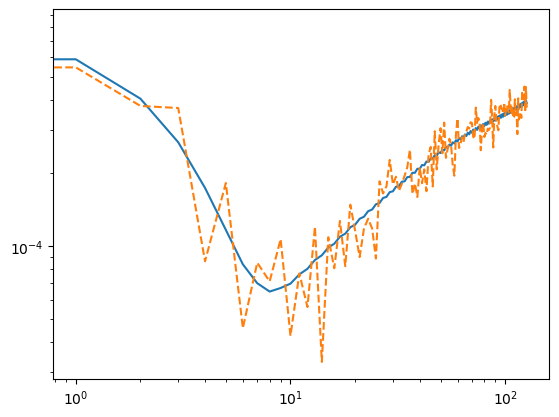

In [35]:
plt.plot((theoretical_r1_tensor[1]*MICMAC_sampler_obj.r_true + theoretical_red_cov_r0_total[:,1,1])*(2*jnp.arange(MICMAC_sampler_obj.lmin, MICMAC_sampler_obj.lmax+1) +1) )
plt.plot(c_ell_CMB_map[1], '--')
plt.loglog()
plt.show()

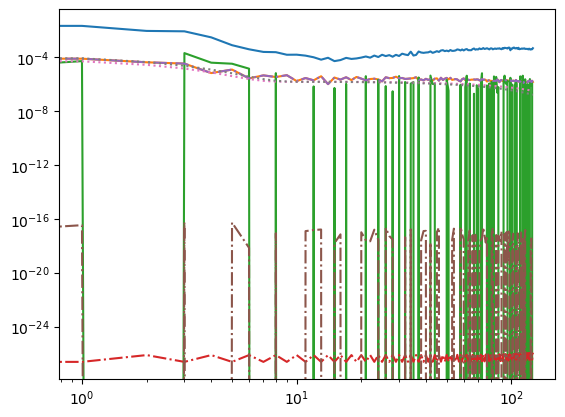

In [36]:
plt.plot(c_ell_CMB_map_0.T)
plt.plot(c_ell_CMB_map_without_E_modes_0.T, '-.')
plt.plot(theoretical_r1_tensor.T*MICMAC_sampler_obj.r_true, ':')
plt.loglog()
plt.show()

In [37]:
masked_input_CMB_map_without_E_modes = input_CMB_map_without_E_modes*mask

masked_input_CMB_map_without_E_modes_extended = np.vstack([np.zeros_like(masked_input_CMB_map_without_E_modes[0]), masked_input_CMB_map_without_E_modes])
c_ell_masked_CMB_map_without_E_modes_0 = hp.anafast(masked_input_CMB_map_without_E_modes_extended, lmax=MICMAC_sampler_obj.lmax, iter=MICMAC_sampler_obj.n_iter)[indices_polar,MICMAC_sampler_obj.lmin:]*(2*jnp.arange(MICMAC_sampler_obj.lmin, MICMAC_sampler_obj.lmax+1) +1) 


In [38]:
f_sky = np.sum(mask)/len(mask)

In [39]:
theoretical_red_cov_r0_total_without_E_modes = np.copy(theoretical_red_cov_r0_total)
theoretical_red_cov_r0_total_without_E_modes[:,0,0] = 0
theoretical_red_cov_r1_tensor_without_E_modes = np.copy(theoretical_red_cov_r1_tensor)
theoretical_red_cov_r1_tensor_without_E_modes[:,0,0] = 0

test_r_minimizer_without_E_modes = get_r_estimate_B(MICMAC_sampler_obj, c_ell_masked_CMB_map_without_E_modes_0[1]/f_sky, theoretical_red_cov_r1_tensor_without_E_modes[:,1,1])
test_r_minimizer_without_E_modes

Array(0.00906071, dtype=float64)

In [40]:
test_r_minimizer_without_E_modes_binned = get_binned_r_estimate_B(MICMAC_sampler_obj, c_ell_masked_CMB_map_without_E_modes_0[1]/f_sky, theoretical_red_cov_r1_tensor_without_E_modes[:,1,1])
test_r_minimizer_without_E_modes_binned

Array(0.00888454, dtype=float64)

In [41]:
test_r_minimizer_without_E_modes_binned = get_binned_r_estimate_B_v2(MICMAC_sampler_obj, c_ell_masked_CMB_map_without_E_modes_0[1]/f_sky, theoretical_red_cov_r1_tensor_without_E_modes[:,1,1])
test_r_minimizer_without_E_modes_binned

Array(0.008901, dtype=float64)

In [42]:
delta_ell = 5

nb_bin = (MICMAC_sampler_obj.lmax-MICMAC_sampler_obj.lmin+1)//delta_ell
MICMAC_sampler_obj.bin_ell_distribution = MICMAC_sampler_obj.lmin + jnp.arange(nb_bin+1)*delta_ell


In [43]:
test_r_minimizer_without_E_modes

Array(0.00906071, dtype=float64)

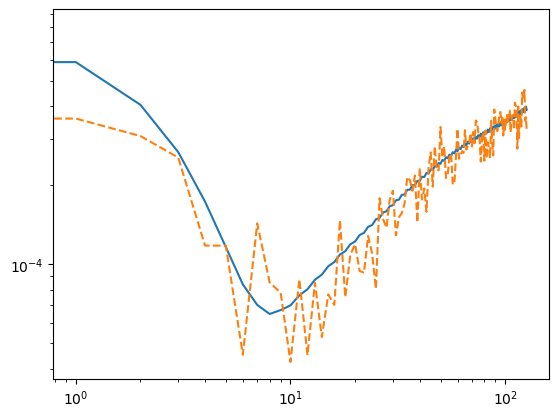

In [44]:
plt.plot((theoretical_red_cov_r1_tensor[:,1,1]*MICMAC_sampler_obj.r_true + theoretical_red_cov_r0_total[:,1,1])*(2*jnp.arange(MICMAC_sampler_obj.lmin, MICMAC_sampler_obj.lmax+1) +1) )
plt.plot(c_ell_masked_CMB_map_without_E_modes_0[1]/f_sky, '--')
plt.loglog()
plt.show()

In [45]:
mask_directory = '/Users/mag/Documents/PHD1Y/Masks/'

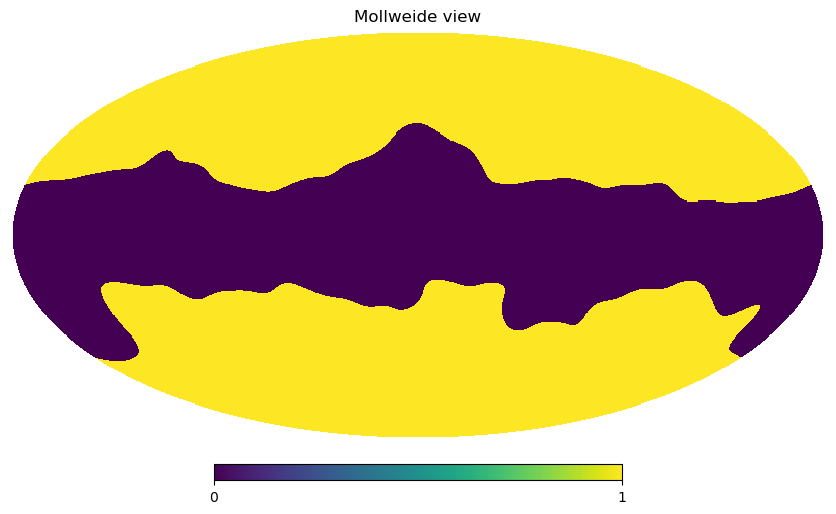

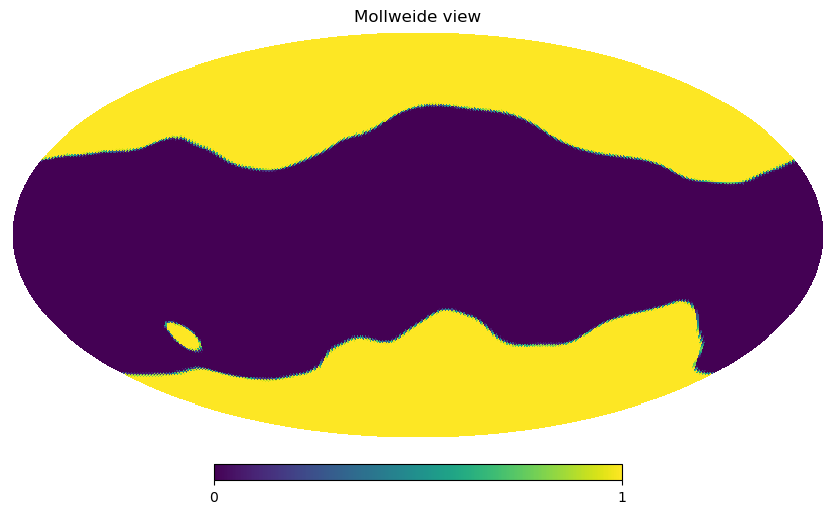

In [46]:
maks_Planck_60 = hp.read_map(mask_directory + 'Planck_mask_fsky_60.fits')
maks_Planck_40 = hp.read_map(mask_directory + 'Planck_mask_fsky_40.fits')

hp.mollview(maks_Planck_60)
hp.mollview(hp.ud_grade(maks_Planck_40,nside_out=64, dtype=np.float64))

In [47]:
full_maks_Planck = hp.read_map(mask_directory + 'HFI_Mask_GalPlane-apo0_2048_R2.00.fits', field=None)


In [48]:
full_maks_Planck.shape

(8, 50331648)

setting the output map dtype to [dtype('uint8')]


0.20479756593704224


OSError: File /Users/mag/Documents/PHD1Y/Masks/Planck_mask_fsky_20.fits already exists. If you mean to replace it then use the argument "overwrite=True".

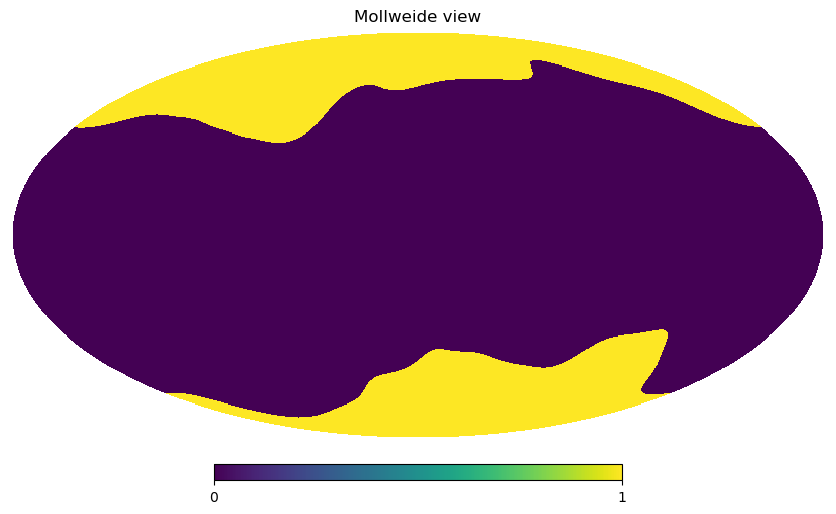

In [49]:
print(full_maks_Planck[0].sum()/full_maks_Planck[0].size)
hp.mollview(full_maks_Planck[0])
hp.write_map(mask_directory + 'Planck_mask_fsky_20.fits', full_maks_Planck[0])


setting the output map dtype to [dtype('uint8')]


0.7004634737968445


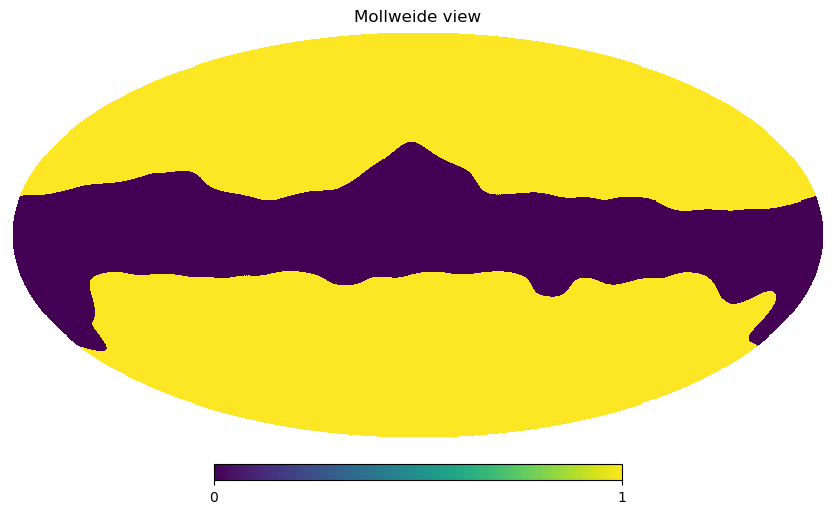

In [ ]:
idx_field = 3
print(full_maks_Planck[idx_field].sum()/full_maks_Planck[idx_field].size)
hp.mollview(full_maks_Planck[idx_field])
hp.write_map(mask_directory + 'Planck_mask_fsky_70.fits', full_maks_Planck[idx_field])


setting the output map dtype to [dtype('uint8')]


0.8000455101331075


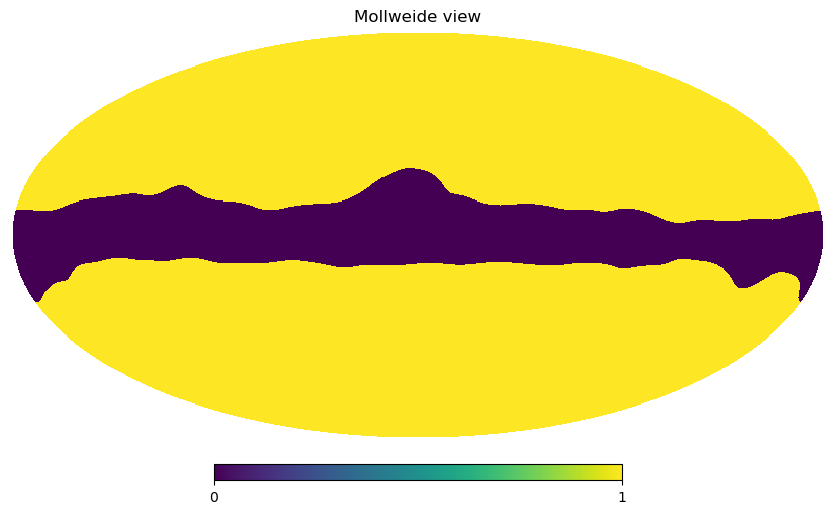

In [ ]:
idx_field = 4
print(full_maks_Planck[idx_field].sum()/full_maks_Planck[idx_field].size)
hp.mollview(full_maks_Planck[idx_field])
hp.write_map(mask_directory + 'Planck_mask_fsky_80.fits', full_maks_Planck[idx_field])


setting the output map dtype to [dtype('uint8')]


0.9000752369562784


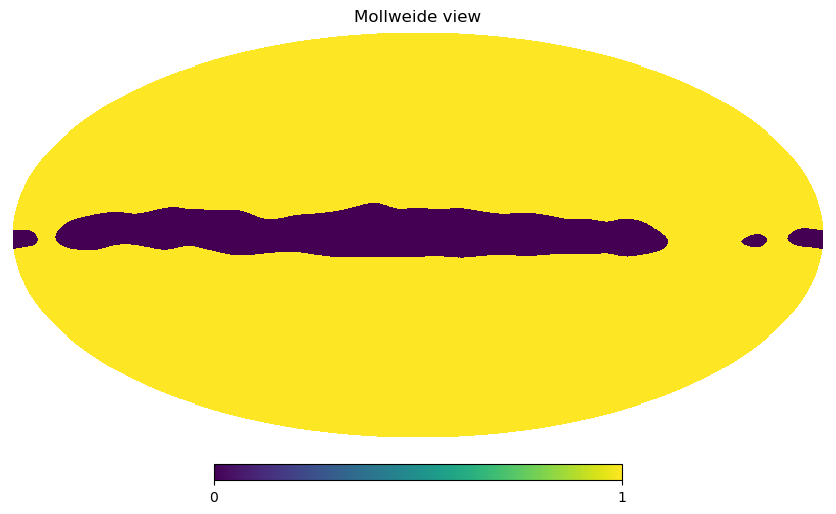

In [ ]:
idx_field = 5
print(full_maks_Planck[idx_field].sum()/full_maks_Planck[idx_field].size)
hp.mollview(full_maks_Planck[idx_field])
hp.write_map(mask_directory + 'Planck_mask_fsky_90.fits', full_maks_Planck[idx_field])
